# 富士下山問題
## 標高データの取得
---

In [75]:
# Colaboratoryにおいて、以下の方法だとうまくファイルを読み込めなかったのでpandasモジュールを今回は使用する

# import numpy as np
# csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

# np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
# fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# print(fuji[130:140])

In [76]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/UmiSora0516/diveintocode-ml/master/Week2/mtfuji_data.csv')
fuji = df.values

print(fuji.shape)
print(fuji[130:140])

(300, 5)
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## 【問題1】データの可視化
---
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

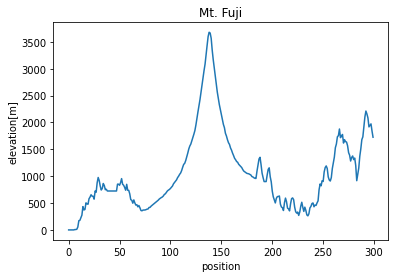

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成
---
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [78]:
def get_gradient_at_point(point):
    '''
    ある地点の勾配を計算する関数
    Parameters
    ------------
    point: int型
        ある地点
    
    Returns
    ------------
    gradient: float型
        ある地点の勾配
    '''
    
    # yの変化量（標高）
    d_y = fuji[1:, 3]-fuji[:-1, 3]

    # xの変化量（その地点の番号）
    d_x = fuji[1:, 0]-fuji[:-1, 0]

    # 勾配
    gradient = d_y / d_x
    
    return gradient[point-1]

In [79]:
#  関数のチェック
get_gradient_at_point(136)

168.35000000000036

## 【問題3】移動先の地点を計算する関数を作成
---
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
<br><br>
数式で表すと**「移動先の地点 = 今いる地点 - α×今いる地点の勾配」**となります。
<br><br>
「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。αは0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

In [80]:
def get_destination_point(point, alpha=0.2):
    '''
    移動先の地点を計算する関数
    Parameters
    ------------
    point: int型
        ある地点
    
    Returns
    ------------
    destination_pts: int型
        ある地点の勾配
    '''
    
    ALPHA = alpha  #ハイパーパラメータ
    
    # 移動先の地点 = 今いる地点 - α ×今いる地点の勾配
    res = point - ALPHA * get_gradient_at_point(point)
    
    #移動先の地点を四捨五入するしint型で返す
    destination_pts = int(round(res))
    
    #移動先の地点が300点を超えた場合は、下山したと見なし、戻り値を0として返す
    if destination_pts > 300:
        destination_pts = 0
    
    return destination_pts

In [81]:
#  関数のチェック
get_destination_point(136)

102

## 【問題4】山を下る関数を作成
---
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。
<br><br>
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

In [82]:
def go_down_fuji(start_pts):
    '''
    山を下る関数
    Parameters
    ------------
    start_pts: int型
        最初の地点
    
    Returns
    ------------
    dest_pts_list: list型
        移動毎の地点リスト
    '''
        
    dest_pts_list = [start_pts]
    current_pts = start_pts #今いる地点
    count = 0   #移動回数
    
    #スタート地点が0の場合は、何も処理を実行せずに終了する
    if start_pts == 0:
        return dest_pts_list
    
    while True:
        current_pts = get_destination_point(current_pts)
        dest_pts_list.append(current_pts)
        count += 1
        
        # 今いる地点が0以下の場合は下山したと見なす
        if current_pts <= 0:
            break
        # 移動先の地点が今いる地点と同じ場合は下山したと見なす
        elif len(dest_pts_list) >= 2 and dest_pts_list[-2] == dest_pts_list[-1]:
            break
            
        elif count == 50:
            # 移動回数が50回に達したらプログラムを終了する
            break
            
    return dest_pts_list

In [83]:
#  関数のチェック
dest_pts_list = go_down_fuji(136)
print(dest_pts_list)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]


## 【問題5】下山過程の可視化
---
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

**《可視化例》**
*   断面図の中に移動した地点を点で表示する
*   繰り返し毎の標高や勾配を折れ線グラフにする
  


In [84]:
# yの変化量（標高）
d_y = fuji[1:, 3]-fuji[:-1, 3]

# xの変化量（その地点の番号）
d_x = fuji[1:, 0]-fuji[:-1, 0]

# 勾配
gradient = d_y / d_x

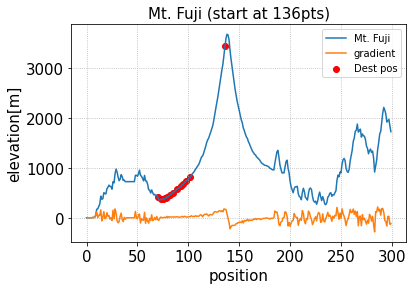

In [85]:
def show_mtFuji_graph(dest_pts_list, str_title_label):
    '''
    移動の経過点をもとにグラフを描画する関数
    Paramaters
    -----------
    dest_pts_list: dnarray型
        下山過程の移動点のリスト
    str_title_label：string型
        グラフのタイトル
        
    Returns
    -----------
    なし
    '''
    import matplotlib.pyplot as plt
    %matplotlib inline

    # 移動した地点の標高リスト
    elevation_list = fuji[:, 3]
    elevation_pts_list = elevation_list[dest_pts_list]

    plt.title(str_title_label, fontsize = 15)
    plt.xlabel("position", fontsize = 15)
    plt.ylabel("elevation[m]", fontsize = 15)
    plt.tick_params(labelsize=15)
    plt.plot(fuji[:, 0], fuji[:, 3], label = 'Mt. Fuji')
    plt.scatter(dest_pts_list, elevation_pts_list, color = 'red', label = 'Dest pos')
    plt.plot(fuji[1:, 0], gradient, label = 'gradient')
    plt.legend()
    plt.grid(linestyle = 'dotted')
    plt.show()


#　初期値が136番の地点の場合
dest_pts_list = go_down_fuji(136)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (start at 136pts)')

## 【問題6】初期値の変更
---
問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。具体的には、「今いる地点」を変更できるようにするということです。

In [86]:
#全ての地点を計算する
for i in range(300):
    dest_pts_list = go_down_fuji(i)
    print("今いる地点：{}番  {}".format(i, dest_pts_list))

今いる地点：0番  [0]
今いる地点：1番  [1, 1]
今いる地点：2番  [2, 2]
今いる地点：3番  [3, 3]
今いる地点：4番  [4, 4]
今いる地点：5番  [5, 5]
今いる地点：6番  [6, 5, 5]
今いる地点：7番  [7, 7]
今いる地点：8番  [8, 7, 7]
今いる地点：9番  [9, 1, 1]
今いる地点：10番  [10, -13]
今いる地点：11番  [11, 10, -13]
今いる地点：12番  [12, 2, 2]
今いる地点：13番  [13, 4, 4]
今いる地点：14番  [14, -18]
今いる地点：15番  [15, 27, 31, 51, 41, 41]
今いる地点：16番  [16, 14, -18]
今いる地点：17番  [17, -8]
今いる地点：18番  [18, 22, 13, 4, 4]
今いる地点：19番  [19, 21, 15, 27, 31, 51, 41, 41]
今いる地点：20番  [20, -1]
今いる地点：21番  [21, 15, 27, 31, 51, 41, 41]
今いる地点：22番  [22, 13, 4, 4]
今いる地点：23番  [23, 28, -8]
今いる地点：24番  [24, 24]
今いる地点：25番  [25, 36, 52, 37, 35, 43, 43]
今いる地点：26番  [26, -4]
今いる地点：27番  [27, 31, 51, 41, 41]
今いる地点：28番  [28, -8]
今いる地点：29番  [29, 10, -13]
今いる地点：30番  [30, 41, 41]
今いる地点：31番  [31, 51, 41, 41]
今いる地点：32番  [32, 47, 47]
今いる地点：33番  [33, 27, 31, 51, 41, 41]
今いる地点：34番  [34, 15, 27, 31, 51, 41, 41]
今いる地点：35番  [35, 43, 43]
今いる地点：36番  [36, 52, 37, 35, 43, 43]
今いる地点：37番  [37, 35, 43, 43]
今いる地点：38番  [38, 44, 44]
今いる地点：39番  [39, 39]
今いる地点：4

## 【問題7】初期値ごとの下山過程の可視化
---
問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。勾配降下法において 初期値 が結果に影響を与えることが確認できます。

**《初期値とは》**

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

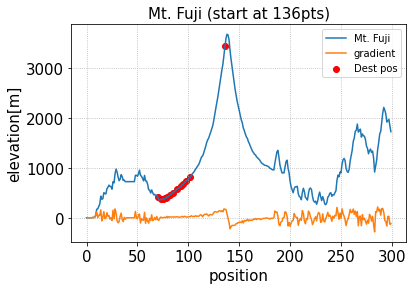

In [87]:
#　初期値が136番の地点の場合
dest_pts_list = go_down_fuji(136)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (start at 136pts)')

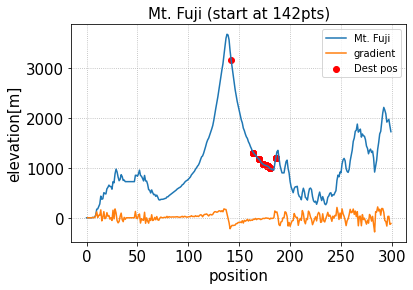

In [88]:
#　初期値が142番の地点の場合
dest_pts_list = go_down_fuji(142)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (start at 142pts)')

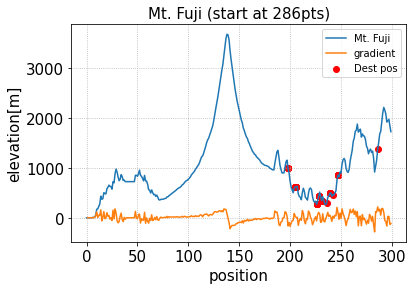

In [89]:
#　初期値が286番の地点の場合
dest_pts_list = go_down_fuji(286)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (start at 286pts)')

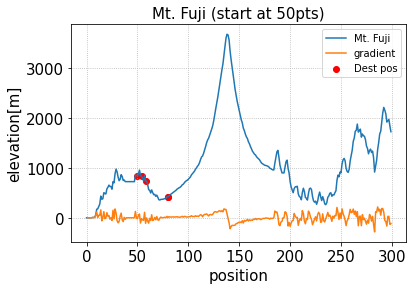

In [90]:
#　初期値が286番の地点の場合
dest_pts_list = go_down_fuji(50)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (start at 50pts)')

## 【問題8】（アドバンス問題）ハイパーパラメータの変更
---
ハイパーパラメータ α
を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [91]:
def go_down_fuji_with_alpha(start_pts, alpha=0.2):
    '''
    山を下る関数
    Parameters
    ------------
    start_pts: int型
        最初の地点
    alpha: folat型
        ハイパーパラメータ α の値
    
    Returns
    ------------
    dest_pts_list: list型
        移動毎の地点リスト
    '''
        
    dest_pts_list = [start_pts]
    current_pts = start_pts #今いる地点
    count = 0   #移動回数
    
    #スタート地点が0の場合は、何も処理を実行せずに終了する
    if start_pts == 0:
        return dest_pts_list
    
    while True:
        current_pts = get_destination_point(current_pts, alpha)
        dest_pts_list.append(current_pts)
        count += 1
        
        # 今いる地点が0以下の場合は下山したと見なす
        if current_pts <= 0:
            break
        # 移動先の地点が今いる地点と同じ場合は下山したと見なす
        elif len(dest_pts_list) >= 2 and dest_pts_list[-2] == dest_pts_list[-1]:
            break
            
        elif count == 50:
            # 移動回数が50回に達したらプログラムを終了する
            break
            
    return dest_pts_list

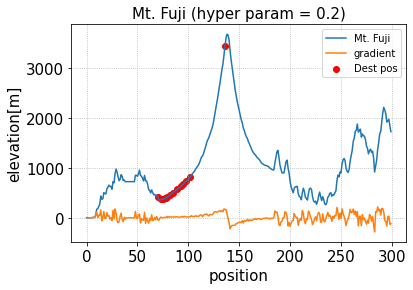

In [92]:
#　初期値が136番の地点、ハイパーパラメータが0.2の場合
dest_pts_list = go_down_fuji_with_alpha(136, 0.2)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (hyper param = 0.2)')

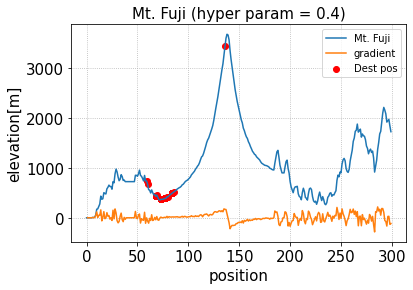

In [93]:
#　初期値が136番の地点、ハイパーパラメータが0.4の場合
dest_pts_list = go_down_fuji_with_alpha(136, 0.4)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (hyper param = 0.4)')

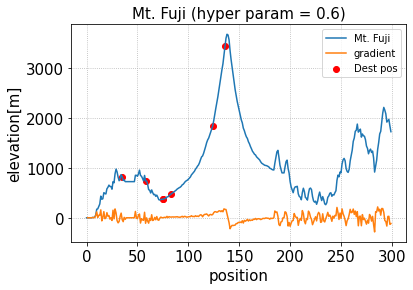

In [94]:
#　初期値が136番の地点、ハイパーパラメータが0.6の場合
dest_pts_list = go_down_fuji_with_alpha(136, 0.6)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (hyper param = 0.6)')

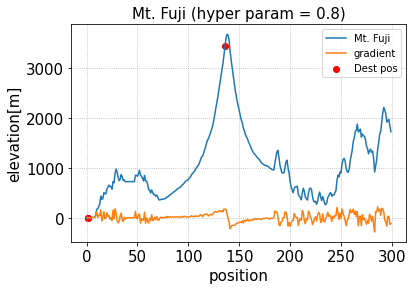

In [95]:
#　初期値が136番の地点、ハイパーパラメータが0.8の場合
dest_pts_list = go_down_fuji_with_alpha(136, 0.8)    
show_mtFuji_graph(dest_pts_list, 'Mt. Fuji (hyper param = 0.8)')